# Previsão de falência de empresas ‍💼💰📈
#### Aprendizagem Supervisionada

### Sobre a base da dados:

Este é um conjunto de dados coletados do Taiwan Economic Journal para os anos de 1999 a 2009. A falência da empresa foi definida com base nas regulamentações comerciais da Bolsa de Valores de Taiwan.

### Objetivo do nosso projeto:

Este notebook contempla a criação de um **modelo preditivo para classificar se a empresa está falindo ou não,** utilizando a base de dados "Company Bankruptcy Prediction" do Kaggle.

O link dessa base e mais detalhes se encontra em: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

### Importando as bibliotecas necessárias

In [1]:
# Para a análise e visualização dos dados 
import pandas as pd
import numpy as np

# Para análises gráficas
import seaborn as sns
import matplotlib.pyplot as plt


### Tratando os dados

Nessa etapa, foi utilizado um tratamento de dados e foi possível analisar que uma das colunas estava com alguns caracteres especiais. Como a maioria das features são do tipo numéricas, e apenas duas são binárias, não foi necessário categorizar os dados.

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('arquivo_original.csv', delimiter= ",")
df.head()


,Net Value Per Share (B),Total debt/Total net worth,Debt ratio %,Net worth/Assets,Total Asset Turnover,Quick Assets/Total Assets,Current Assets/Total Assets,Quick Assets/Current Liability,Current Liability to Assets,Working Capital/Equity,Long-term Liability to Current Assets,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Current Liability to Liability,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Net Income Flag,Equity to Liability,Bankrupt?,Operating Expense Rate,Total income/Total expense
0,0.147950,0.021266,0.207576,0.792424,0.086957,0.166673,0.190643,0.001997,0.147308,0.721275,0.025592,0.064856,0.593831,0.671568,0.676269,0.312905,0.118250,0,0.716845,1,0.016469,1,1.256970e-04,0.002022
1,0.182251,0.012502,0.171176,0.828824,0.064468,0.127236,0.182419,0.004136,0.056963,0.731975,0.023947,0.025516,0.593916,0.671570,0.308589,0.314163,0.047775,0,0.795297,1,0.020794,1,2.897850e-04,0.002226
2,0.177911,0.021248,0.207516,0.792484,0.014993,0.340201,0.602806,0.006302,0.098162,0.742729,0.003715,0.021387,0.594502,0.671571,0.446027,0.314515,0.025347,0,0.774670,1,0.016474,1,2.361300e-04,0.002060
3,0.154187,0.009572,0.151465,0.848535,0.089955,0.161575,0.225815,0.002961,0.098715,0.729825,0.022165,0.024161,0.593889,0.671519,0.615848,0.302382,0.067250,0,0.739555,1,0.023982,1,1.078890e-04,0.001831
4,0.167502,0.005150,0.106509,0.893491,0.175412,0.260330,0.358380,0.004275,0.110195,0.732000,0.000000,0.026385,0.593915,0.671563,0.975007,0.311567,0.047725,0,0.795016,1,0.035490,1,7.890000e+09,0.002224


In [3]:
df.shape

(6810, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Net Value Per Share (B)                6810 non-null   float64
 1   Total debt/Total net worth             6810 non-null   float64
 2   Debt ratio %                           6810 non-null   float64
 3   Net worth/Assets                       6810 non-null   float64
 4   Total Asset Turnover                   6810 non-null   float64
 5   Quick Assets/Total Assets              6810 non-null   float64
 6   Current Assets/Total Assets            6810 non-null   float64
 7   Quick Assets/Current Liability         6810 non-null   float64
 8   Current Liability to Assets            6810 non-null   float64
 9   Working Capital/Equity                 6810 non-null   float64
 10  Long-term Liability to Current Assets  6810 non-null   float64
 11  Tota

In [5]:
df_tratado = df.drop(['Operating Expense Rate', 'Net Income Flag'], axis = 1)

df_tratado.shape


(6810, 22)

### Analisando as variáveis que vão compor o modelo

<Axes: >

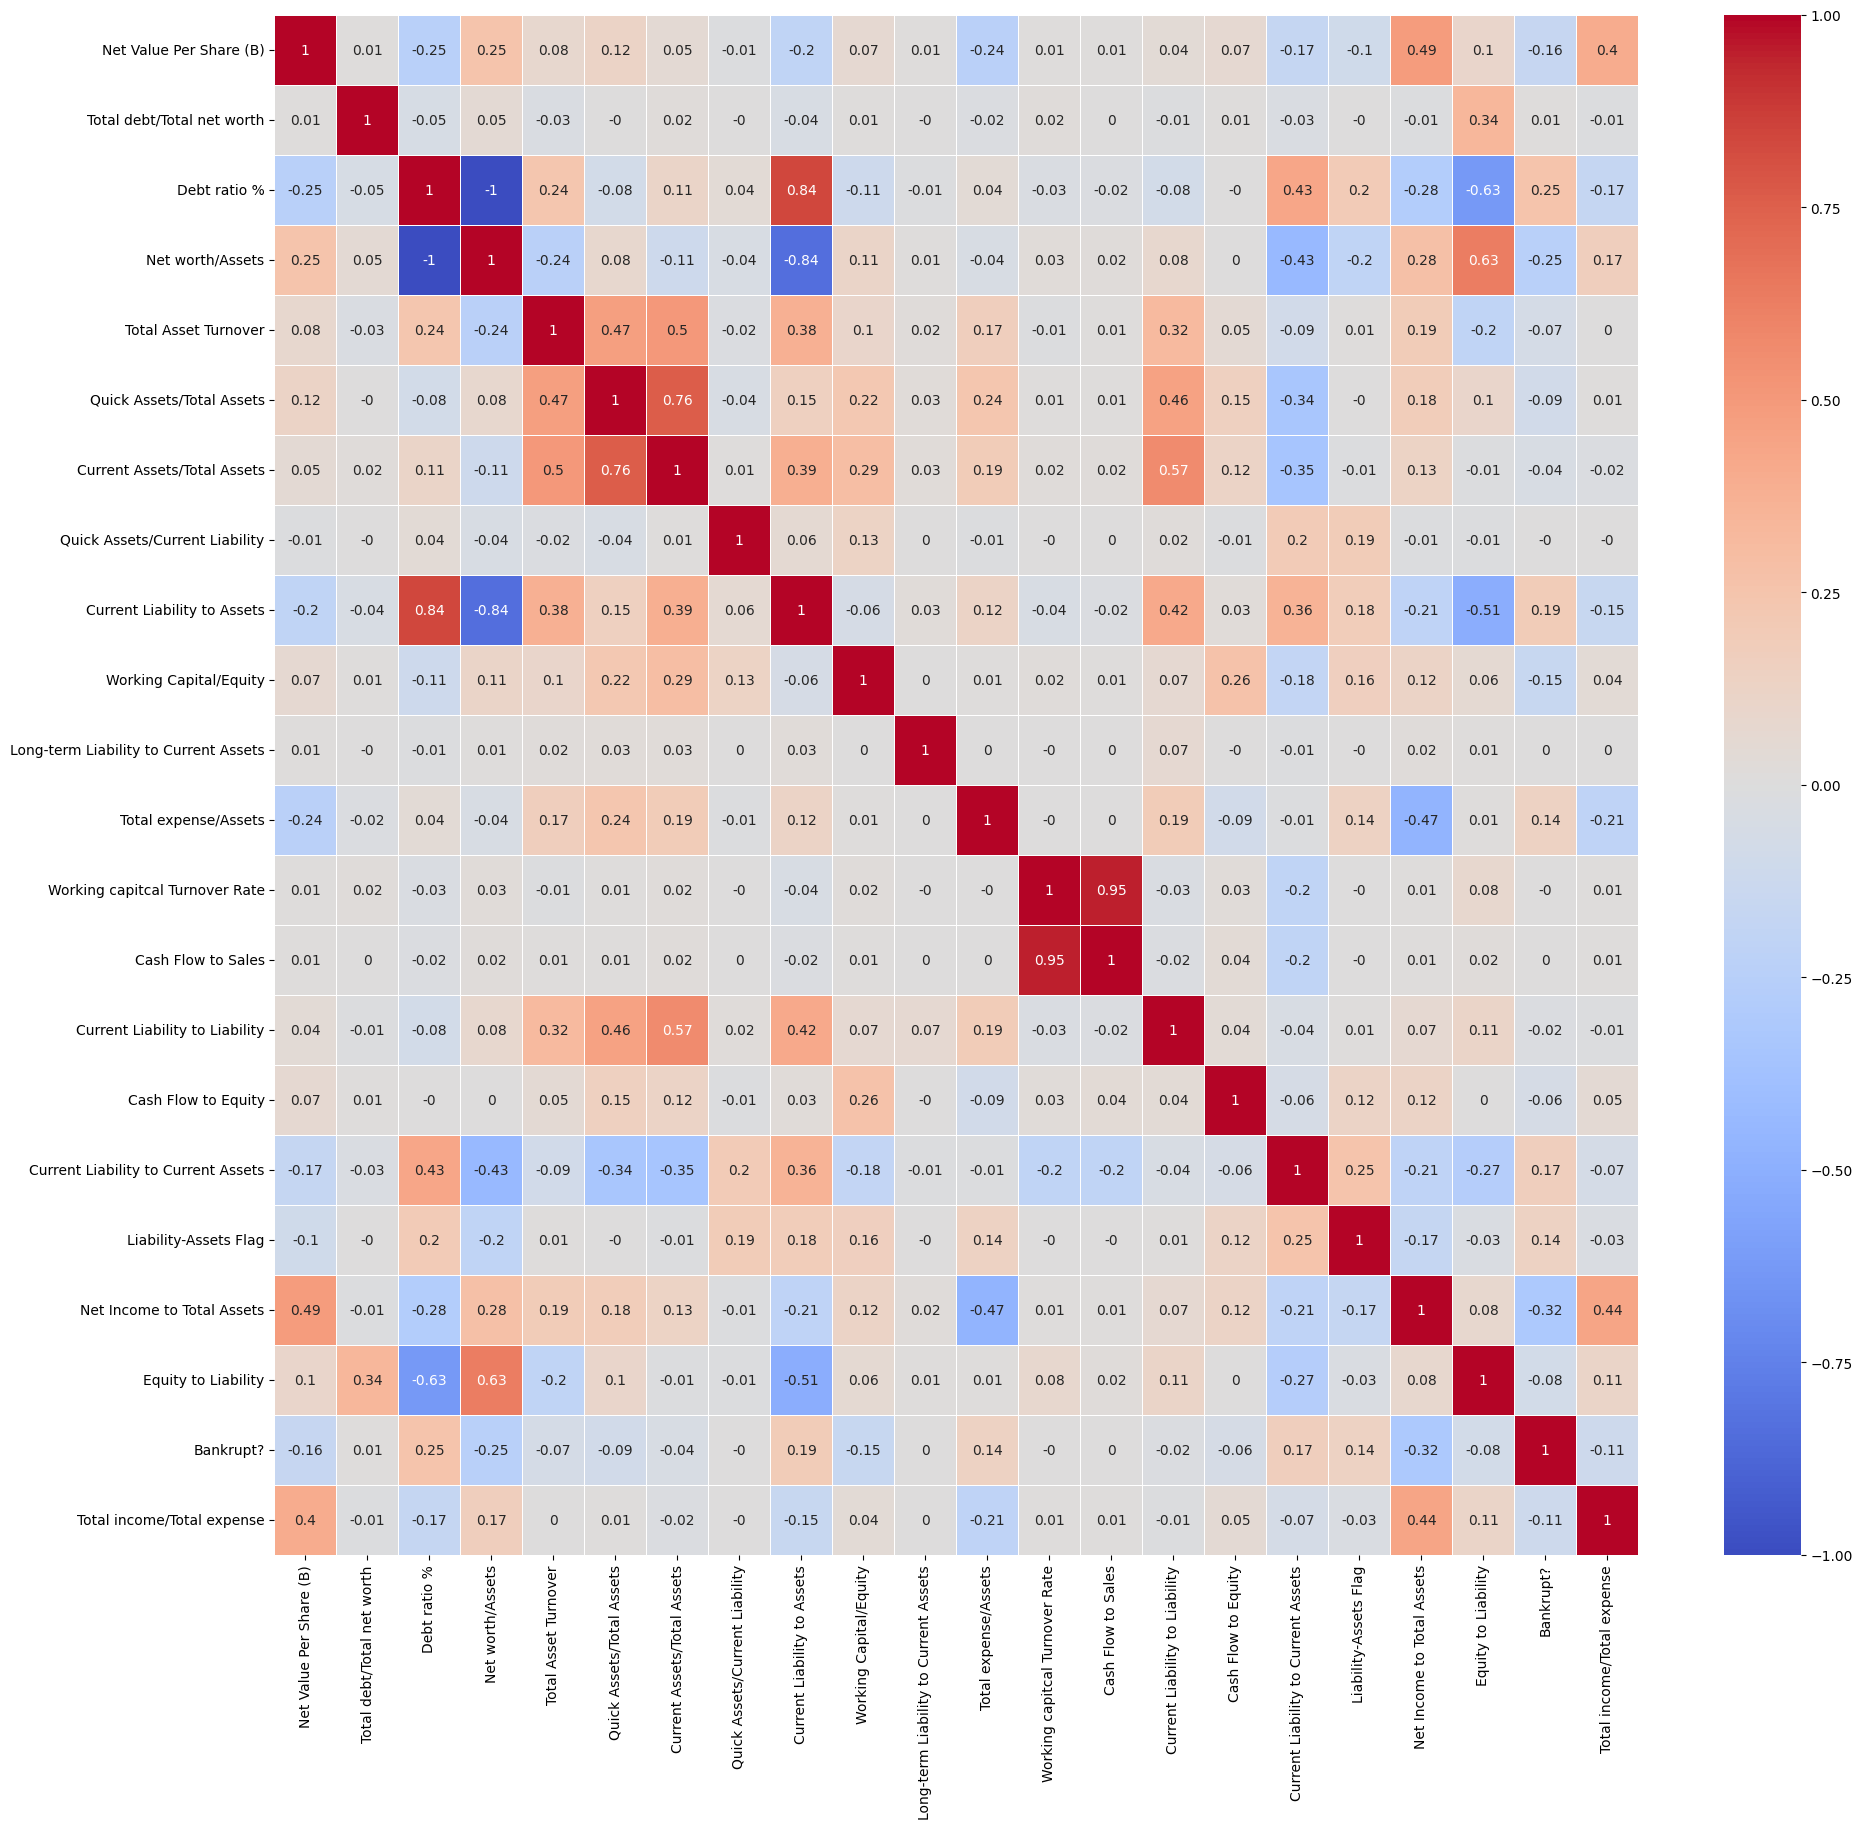

In [6]:
correlation_matrix = df_tratado.corr().round(2)

fig, ax = plt.subplots(figsize = (22,20))
sns.heatmap(data=correlation_matrix, annot= True, linewidths= .5, ax=ax, cmap= "coolwarm")

### Separando os arquivos em treino e teste

In [7]:
df_tratado.columns

Index(['Net Value Per Share (B)', 'Total debt/Total net worth', 'Debt ratio %',
       'Net worth/Assets', 'Total Asset Turnover', 'Quick Assets/Total Assets',
       'Current Assets/Total Assets', 'Quick Assets/Current Liability',
       'Current Liability to Assets', 'Working Capital/Equity',
       'Long-term Liability to Current Assets', 'Total expense/Assets',
       'Working capitcal Turnover Rate', 'Cash Flow to Sales',
       'Current Liability to Liability', 'Cash Flow to Equity',
       'Current Liability to Current Assets', 'Liability-Assets Flag',
       'Net Income to Total Assets', 'Equity to Liability', 'Bankrupt?',
       'Total income/Total expense'],
      dtype='object')

In [8]:
# Separando os dados em treino e teste (método hold out)

from sklearn.model_selection import train_test_split

#X = df_tratado.drop("Bankrupt?", axis=1)
X = df_tratado[["Debt ratio %", "Total Asset Turnover", "Quick Assets/Total Assets", "Current Assets/Total Assets", "Current Liability to Assets", "Total expense/Assets", "Current Liability to Liability", "Current Liability to Current Assets", "Liability-Assets Flag", "Equity to Liability", "Net worth/Assets"]]
Y = df_tratado["Bankrupt?"]

# Separando os dados em treino (70%) e teste (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify= Y, random_state=7)



In [9]:
print(X_train.shape, X_test.shape)

(4767, 11) (2043, 11)


### Criando uma função para executar modelos de machine learning

In [10]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train, Y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(Y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print("Classification Report:")
    print(classification_report(Y_test, predicao))

    print("Roc Curve:")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(Y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

##### KNN (K-Nearest Neighbors)

AUC 0.6519250213891266
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1978
           1       0.35      0.11      0.16        65

    accuracy                           0.97      2043
   macro avg       0.66      0.55      0.57      2043
weighted avg       0.95      0.97      0.96      2043

Roc Curve:


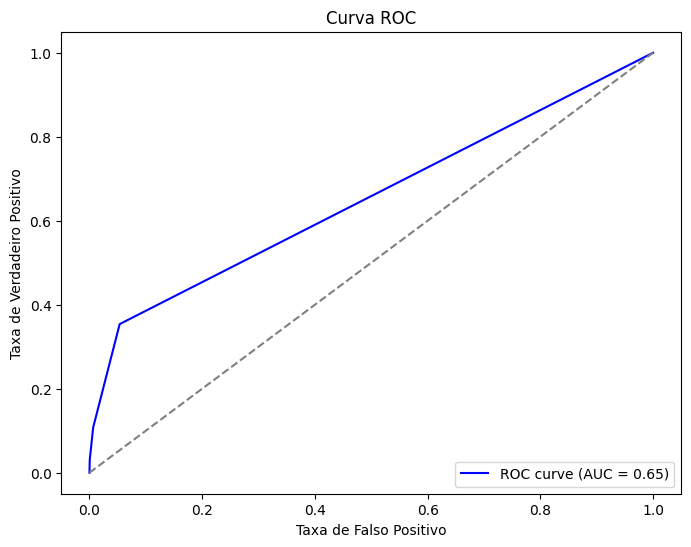

In [11]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

#### Modelo Random Forest

AUC 0.842587695418838
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1978
           1       0.33      0.06      0.10        65

    accuracy                           0.97      2043
   macro avg       0.65      0.53      0.54      2043
weighted avg       0.95      0.97      0.95      2043

Roc Curve:


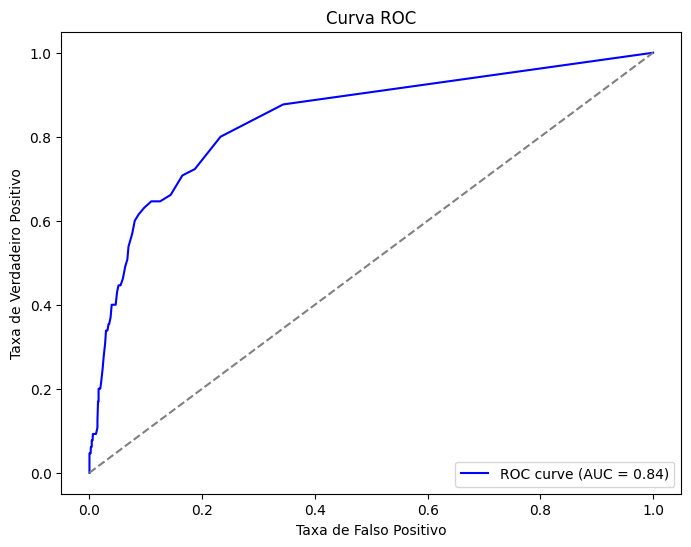

In [12]:
from sklearn.ensemble import RandomForestClassifier
modelo_arvoredecisao = RandomForestClassifier()
roda_modelo(modelo_arvoredecisao)

#### Gradient Boosting

AUC 0.8443104923388037
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1978
           1       0.27      0.06      0.10        65

    accuracy                           0.96      2043
   macro avg       0.62      0.53      0.54      2043
weighted avg       0.95      0.96      0.95      2043

Roc Curve:


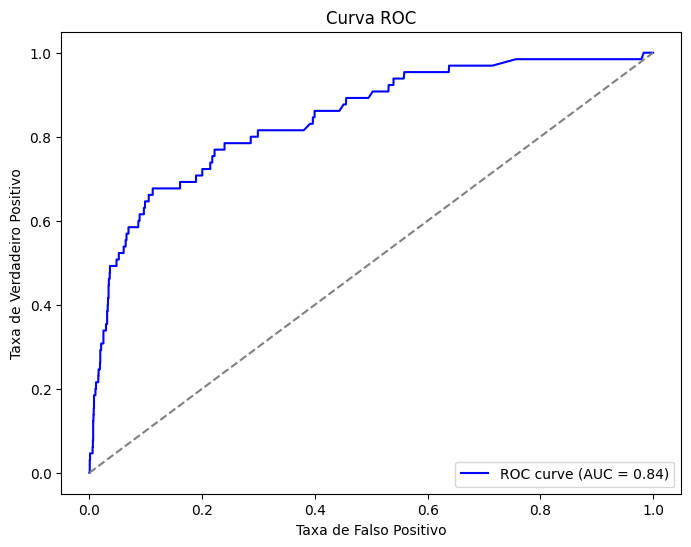

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_gradientboosting = GradientBoostingClassifier()
roda_modelo(modelo_gradientboosting)

#### Neural Network

AUC 0.8862954032822588
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1978
           1       0.60      0.09      0.16        65

    accuracy                           0.97      2043
   macro avg       0.79      0.55      0.57      2043
weighted avg       0.96      0.97      0.96      2043

Roc Curve:


c:\Users\nycol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


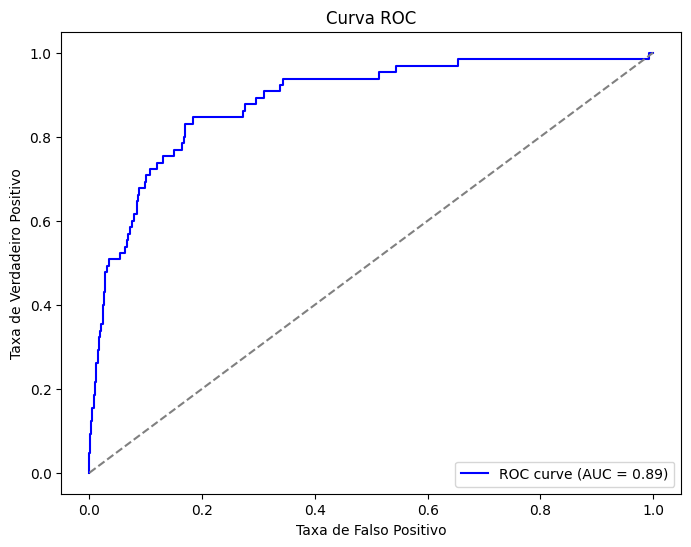

In [14]:
from sklearn.neural_network import MLPClassifier
modelo_neuralnetwork = MLPClassifier()
roda_modelo(modelo_neuralnetwork)

### Calculando e visualizando as Matrizes de confusão

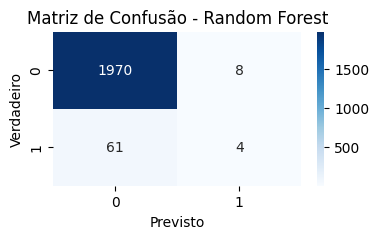

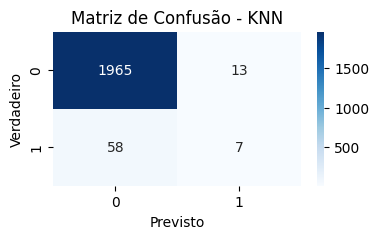

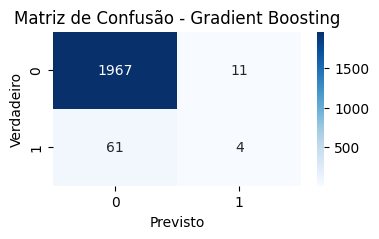

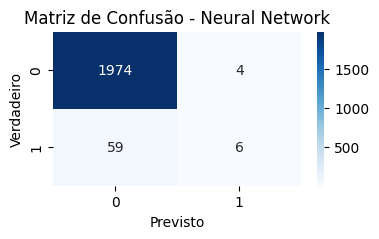

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fazendo previsões
y_pred_arvoredecisao = modelo_arvoredecisao.predict(X_test)
y_pred_knn = modelo_knn.predict(X_test)
y_pred_gradientboosting = modelo_gradientboosting.predict(X_test)
y_pred_neuralnetwork = modelo_neuralnetwork.predict(X_test)

# Calculando as matrizes de confusão
cm_arvoredecisao = confusion_matrix(Y_test, y_pred_arvoredecisao)
cm_knn = confusion_matrix(Y_test, y_pred_knn)
cm_gradientboosting = confusion_matrix(Y_test, y_pred_gradientboosting)
cm_neuralnetwork = confusion_matrix(Y_test, y_pred_neuralnetwork)

# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

# Plotando as matrizes de confusão
plot_confusion_matrix(cm_arvoredecisao, "Matriz de Confusão - Random Forest")
plot_confusion_matrix(cm_knn, "Matriz de Confusão - KNN")
plot_confusion_matrix(cm_gradientboosting, "Matriz de Confusão - Gradient Boosting")
plot_confusion_matrix(cm_neuralnetwork, "Matriz de Confusão - Neural Network")


In [16]:
novos_dados = pd.read_csv("novos_dados.csv", delimiter= ",")

novos_dados_tratados = novos_dados.drop(['Operating Expense Rate', 'Net Income Flag'], axis = 1)

